
# Serie de Fourier


In [1]:
import time
print(' Última execución  ', time.asctime() )

 Última execución   Fri Apr 25 11:08:14 2025



### Obxectivos

 Concepto de función par, impar e periódica.

 Concepto de base completa de funcións.

 Descomposición dunha función periódica en series de Fourier.

 Relación entre series de Fourier e series numéricas.

 Amosar algúns exemplos sinxelos.


*Nota*

Para que este notebook funcione en colab, precisamos <a href = "https://www.dropbox.com/scl/fi/wwz2w43kqj0s38gm87roj/graph_utils.py?rlkey=rppkwu9tmbnnsojezzj69p1r0&dl=1"> graph_utils.py</a>. Podes descargalo premendo na ligazón, e subilo a colab:


<img src="https://www.dropbox.com/scl/fi/b35vcated0f9lwrw4jy01/colab_upload.jpg?rlkey=l1ag15r0ovkg2dsefze117k1y&raw=1" width=200 align="center" />

In [3]:
# general imports
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# numpy and matplotlib
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
matplotlib.style.use('ggplot')
import graph_utils as gf

figsize = 6, 3.8
cmap    = 'hot'

#### Introdución

 Fourier foi un gran matemático francés da época napoleónica que se decatou de que unha función periódica podía descompoñerse nunha serie de sumas de senos e cosenos...


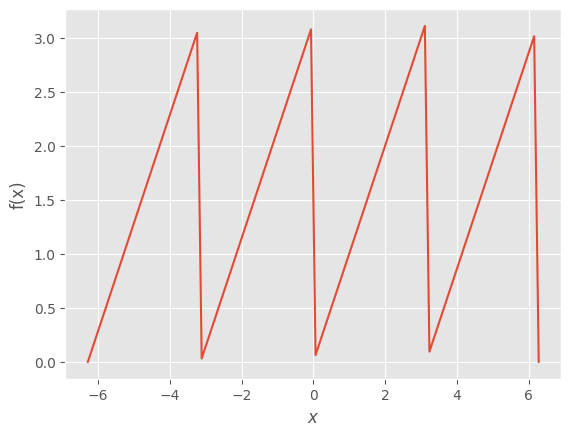

In [4]:
N, T = 2, np.pi
xrange = (-N*T, N*T, 100)
fx = lambda x: np.mod(x, T)
gf.fun1d(fx, xrange);

<img src="imgs/fourier_meme.jpeg" width=400 align="center" />


### Series de Fourier

####  Funcións pares, impares e periódicas.

Dicimos que unha función $f(x)$ é **periódica** con período $T$ se: $f(x + T) = f(x)$.

Por exemplo, $f(x) = \sin(x)$ é unha función periódica do período $T = 2\pi$, $\sin(2\pi + x) = \sin(x)$



Unha función é par se $f(- x) = f(x)$ e impar se $f(-x) = - f(x)$

 Por exemplo, $f(x) = \cos(x)$ é par e $f(x) = \sin(x)$ é impar.

 *Exercicio:* Comproba que dado $n$ natural, $n>0$, $\cos (nx)$ é par e $\sin(nx)$ é impar, e ambos son periódicos co período $2 \pi$


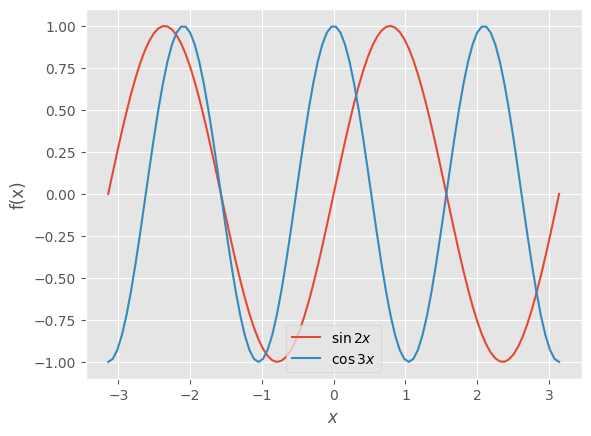

In [10]:
n, m, N = 2, 3, 1
xrange = (-N*np.pi, N*np.pi, 100)
sx = lambda x : np.sin(n*x)
cx = lambda x : np.cos(m*x)
gf.fun1d(sx, xrange, label ='$\\sin '+str(n)+'x$')
gf.fun1d(cx, xrange, newfig = False, label = '$\\cos '+str(m)+'x$');


*Teorema* : Sexa $f(x)$ unha función par e $g(x), \, h(x)$ sexan impares, satisfán:

 1) $g(0) = 0$

 2) $\int_{-a}^{a} f(x) \, \mathrm{d}x = 2 \int_0^af(x) \, \mathrm{d}x$

 3) $\int_{-a}^ag(x) = 0$

 4) $f(x) \, g(x)$ é impar

 5) $g(x) \, h(x)$ é par


Temos tamén:
    
1) $\int_{-\pi}^{\pi} g(x) \, \cos(nx) \, \mathrm{d}x = 0$, 

2) $\int_{-\pi}^{\pi} f(x) \, \sin(nx) \, \mathrm{d}x = 0$,

para $n=1, 2, \dots \in \mathcal{N}$


Toda función $f(x)$ pódese expresar como a suma dunha función par e unha impar.
Definimos:

$$
h(x) = \frac{1}{2}(f(x)  + f(-x)), \; g(x) = \frac{1}{2}(f(x) - f(-x))
$$

 onde $h(x)$ é par, $g(x)$ é impar e $f(x) = h(x) + g(x)$

 *Pregunta:* Converter $f(x) = 0$ se $x \le 0$ e 1 se $x \gt 0$ nunha suma de funcións pares e impares.


#### Funcións ortogonais

 As seguintes funcións, $\sin(nx), \, \cos(mx)$ con $n, m = 1, 2, \dots \in \mathcal{N}$ son "ortogonais".

 **Teorema** : Temos:

1) $\int_{-\pi}^{\pi} \sin(nx) \cos (mx) \mathrm{d}x = 0$

2) $\int_{-\pi}^{\pi} \cos(nx) \cos (mx) \mathrm{d}x = \pi \delta_{nm}$

3) $\int_{-\pi}^{\pi} \sin(nx) \sin (mx) \mathrm{d}x = \pi \delta_{nm}$

 onde:

 $ \delta _{nm} = 1$ se $n = m$ e 0 se $n \ne m$



**Exercicio** : Comproba que as funcións, $\sin nx, \, \cos mx $, con $n, m = 1, 2, \dots \in \mathcal{N}$ son ortogonais en $[-\pi, \pi ]$


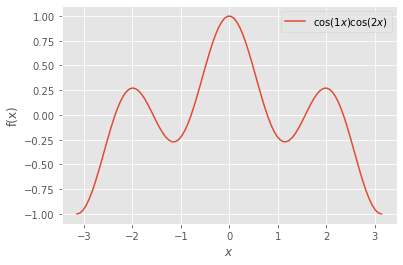

In [46]:
n, m, N = 1, 2, 1
xrange = (-N*np.pi, N*np.pi, 100)
scx = lambda x : np.sin(n*x) * np.cos(m*x)
ssx = lambda x : np.sin(n*x) * np.sin(m*x)
ccx = lambda x : np.cos(n*x) * np.cos(m*x)
#gf.fun1d(scx, xrange, label = '$\sin('+str(n)+'x) \cos('+str(m)+'x)$')
#gf.fun1d(ssx, xrange, newfig = False, label = '$\sin('+str(n)+'x) \sin('+str(m)+'x)$');
gf.fun1d(ccx, xrange, newfig = False, label = '$\cos('+str(n)+'x) \cos('+str(m)+'x)$');

A integral

$$
\int_{-\pi}^{\pi} \sin n x \cos mx \, \mathrm{d}x = 0
$$
 é nula porque o integrando é unha función impar.

 A integral

$$
\int_{-\pi}^{\pi} \sin nx \sin mx \, \mathrm{d}x 
= \int_{-\pi}^{\pi} \frac{1}{2} \left( \cos (n -m) x - \cos (n+m) x \right) \mathrm{d}x
$$
$$
= \frac{1}{2}\left( \frac{1}{n-m} \sin (n-m)x - \frac{1}{n+m} \sin(n+m) x\right) \Big|_{-\pi}^{\pi}
$$

 vale 0 se $ n \ne m$ e para $n=m$

$$
\frac{1}{2}\left( x - \frac{1}{2 n} \sin 2n x \right) \Big|_{-\pi}^{\pi} = \pi
$$


e finalmente, a integral

$$
\int_{-\pi}^{\pi} \cos nx \cos mx \, \mathrm{d}x 
= \int_{-\pi}^{\pi} \frac{1}{2} \left( \cos (n -m) x + \cos (n+m) x \right) \mathrm{d}x
$$
$$
= \frac{1}{2}\left( \frac{1}{n-m} \sin (n-m)x + \frac{1}{n+m} \sin(n+m) x\right) \Big|_{-\pi}^{\pi}
$$

vale 0 se $ n \ne m$ e para $n=m$

$$
\frac{1}{2}\left( x + \frac{1}{2 n} \sin 2n x \right) \Big|_{\pi}^{\pi} = \pi
$$


Diremos que dúas **funcións son ortogonais**, $f(x), \, g(x)$, nun intervalo $[a, b]$ se:

 $$
 \int_a^bf(x) \, g(x) \, \mathrm{d}x = 0
 $$

 e ortonormais se a súa norma é a unidade, sendo a súa **norma** :

 $$
 \int_a^bf^2(x) \, \mathrm{d}x = \int_a^bg^2(x) \, \mathrm{d}x = 1
 $$



Dicimos que un conxunto contable ${\Psi_n(x)}$ con $n \in \mathcal{N}$ está **completo** nun intervalo $[a, b]$, se son funcións ortonormais que permiten que "toda" función. $ f(x)$ se poida expresar como:

 $$
 f(x) = \sum_n a_n \, \Psi_n(x)
 $$

 onde $a_n$ son os coeficientes:

 $$
 a_n = \int_a^bf(x) \, \Psi_n(x) \mathrm{d}x
 $$

 é dicir, podemos dar unha función como unha serie de funcións.


#### Series de Fourier

O seguinte conxunto de funcións definidas é completo en $[-\pi, \pi]$:

$$
\left\{ \frac{1}{\sqrt{2\pi}}, \frac{1}{\sqrt{\pi}} \sin nx, \frac{1}{\sqrt{\pi}} \cos mx \right\}
$$

con $n=1, 2, \dots \in \mathrm{N}$

Toda función periódica continua, acoutada, $f(x)$, con período $T= 2 \pi$ pode darse como unha serie de Fourier:
    
$$
f(x) = \frac{a_0}{2} + \sum_{n=1} a_n \cos nx  + \sum_{n=1} b_n \sin nx
$$

onde:

$$
a_0 = \frac{1}{\pi} \int_{-\pi}^{\pi} f(x) \, \mathrm{d}x
$$

$$
a_n = \frac{1}{\pi} \int_{-\pi}^{\pi} f(x) \, \cos nx \, \mathrm{d}x
$$

$$
b_n = \frac{1}{\pi} \int_{-\pi}^{\pi} f(x) \, \sin nx \, \mathrm{d}x
$$


*Pregunta* : Se $f(x)$ é continuo co período $2\pi$ e par, terá coeficientes $b_n$? E se é impar, terá $a_n$?



**Exemplo** : Obter a serie de Fourier da función $f(x)=|x|$, isto é, $f(x) = x$ se $x \ge 0$ e $f(x) = - x$ se $x \le 0$.


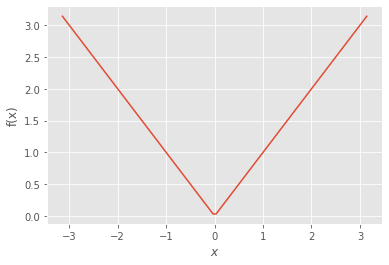

In [47]:
xrange = (-np.pi, np.pi, 100)
def fx(x):
    sign = x/abs(x)
    return sign*x
gf.fun1d(fx, xrange);

É unha función par, polo tanto $b_n = 0$.

$$
a_0 = \frac{2}{\pi} \int_0^\pi x \, \mathrm{d}x = \frac{x^2}{\pi} \Big|_0^\pi = \pi
$$

$$
a_n = \frac{2}{\pi} \int_0^\pi x \, \cos n x \, \mathrm{d}x 
= \frac{2}{\pi} \left( \frac{x}{n} \sin n x + \frac{1}{n^2} \cos n x\right) \Big|_0^\pi = 2 \frac{ ((-1)^n -1)}{\pi n^2}
$$

Se $n$ é par, $a_n = 0$. podemos dar

$$
a_k = \frac{-4}{\pi (2k+1)^2}, \; k = 0, 1, 2 \in \mathcal{N}
$$

Entón:

$$
S(x) = \frac{\pi}{2} - \frac{4}{\pi} \sum_k \frac{1}{(2k+1)^2} \cos (2k+1) x
$$

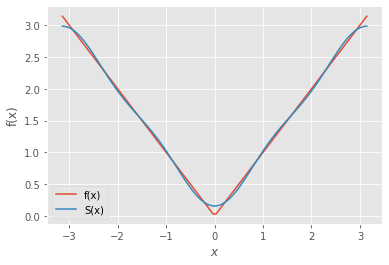

In [48]:
N = 2
def sx(x):
    ss = np.pi/2
    for k in range(0, N):
        ss = ss + -4*np.cos((2*k+1)*x)/(np.pi*(2*k+1)*(2*k+1))
    return  ss
gf.fun1d(fx, xrange, label = 'f(x)');
gf.fun1d(sx, xrange, newfig = False, label = 'S(x)');


Ás veces, as series de Fourier poden axudarnos a calcular series numéricas

*Exercicio*: Calcula, utilizando a expansión de Fourier anterior, o valor de:

 $$
 \sum _{k=0}^\infty \frac{1}{(2 k + 1)^2}
 $$



*Solución* : se valoramos a serie anterior, $f(x) = |x|$, en $x=0$ obtemos:

 $$
 S(0) = \frac{\pi}{2} - \sum _{k=0}^\infty \frac{4}{(2 k +1)^2 \pi} = 0
 $$

 Isto é:

 $$
 \sum _{k=0}^\infty \frac{1}{(2k+1)^2} = \frac{\pi^2}{8}
 $$



**Teorema de Dirichlet** Toda función periódica en $[-\pi, \pi]$ (continua nun número finito de anacos e cun número finito de máximos e mínimos) admite a expansión da serie de Fourier.

 A función pode ser discontinua nun número finito de puntos mentres que a serie de Fourier é *sempre* continua.

 Nos puntos de discontinuidade a serie dános o valor medio entre o seu valor á esquerda e á dereita da función nese punto.



**Exemplo** : Sexa a función definida en $[-\pi, \pi]$

 $$
 f(x) = 0 \; \mathrm{se} \, x \lt 0, 1 \; \mathrm{se} \, x \ge 0
 $$


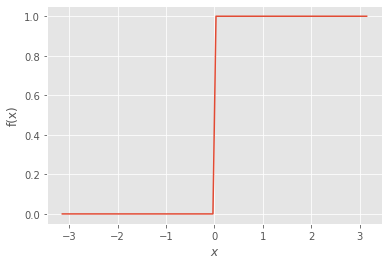

In [49]:
xrange = (-np.pi, np.pi, 100)
def fx(x):
    sig = x/abs(x)
    return  1/2 + sig/2.
gf.fun1d(fx, xrange);

$$
a_0 = \frac{1}{\pi} \int_{-\pi}^{\pi} f(x) \, \mathrm{d}x = \frac{1}{\pi} \int_0^{\pi} \mathrm{d}x = 1
$$

$$
a_n = \frac{1}{\pi} \int_{-\pi}^{\pi} f(x) \, \cos nx \, \mathrm{d}x = \frac{1}{\pi} \int_0^{\pi} \cos nx \, \mathrm{d}x =  \frac{1}{n \pi} \sin n\pi \Big|_0^\pi = 0
$$

$$
b_n = \frac{1}{\pi} \int_{-\pi}^{\pi} f(x) \, \sin nx \, \mathrm{d}x = \frac{1}{\pi} \int_0^{\pi} \sin nx \, \mathrm{d}x  \\ = -\frac{1}{n \pi} \cos nx \Big|_0^{\pi} = -  \frac{(-1)^n -1}{n \pi} =  \frac{1-(-1)^n}{n \pi}
$$

os termos $b_n$ para $n$ par cancelan, polo que podemos dar:

$$
b_k = \frac{2}{(2k+1) \pi}
$$
con $k=0, 1, 2 \dots \in \mathcal{N}$


Polo tanto, a función exprésase coa seguinte serie de Fourier:

 $$
 S(x) = \frac{1}{2} + \sum _{k=0} \frac{2}{(2k+1) \pi} \sin (2k+1)x
 $$



*Experimento:* cambia o número de termos da serie de Fourier no seguinte código e observa a súa converxencia coa función orixinal.


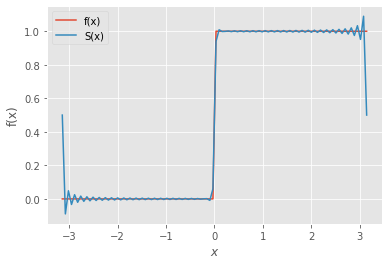

In [50]:
N = 25
def sx(x):
    ss = 1./2.
    for k in range(0, N):
        ss = ss + 2*np.sin((2*k+1)*x)/(np.pi*(2*k+1))
    return  ss
gf.fun1d(fx, xrange, label = 'f(x)');
gf.fun1d(sx, xrange, newfig = False, label = 'S(x)');


*Pregunta:* Canto vale a serie de Fourier en $x=0$? E a función?



#### Series periódicas con período $2L$

 Sexa agora unha función periódica con período $[-L, L]$, podemos dala como unha serie de Fourier a partir do seguinte conxunto de funcións ortonormais.

$$
\left\{ \frac{1}{\sqrt{2L}}, \, \frac{1}{\sqrt{L}} \sin  \frac{n\pi x}{L}, \, \frac{1}{\sqrt{L}} \cos \frac{n \pi x}{L} \right\}
$$


con:

$$
a_0 = \frac{1}{L} \int_{-L}^{L} f(x) \, \mathrm{d}x
$$

$$
a_n = \frac{1}{L} \int_{-L}^{L} f(x) \, \cos \frac{n \pi x}{L} \, \mathrm{d}x
$$

$$
b_n = \frac{1}{L} \int_{-L}^{L} f(x) \, \sin \frac{n \pi x}{L} \, \mathrm{d}x
$$

Así:

$$
S(x) = \frac{a_0}{2} + \sum_{n} a_n \cos \frac{n \pi x}{L} + \sum_{n} b_n \sin \frac{n \pi x}{L}
$$

 *Pregunta* : Que funcións e desenvolvemento tes con $L=\pi$?


#### Expansión de Fourier para unha función non periódica definida nun intervalo [0, L]

 E se a función se define só nunha rexión $[0, L]$?

 Podemos estender a función a $[-L, L]$ por exemplo $f(-x) = f(x)$ facéndoa par, calculando a súa serie de Fourier e declarándoa válida só no intervalo $[0 , L] $.

 Alternativamente, podemos compoñer a serie como suma de series que nos dean o resultado buscado (ver exemplo).



**Exercicio** : Sexa $f(x) = x^2$ definido en $[0, 2]$ da a súa expansión en serie de Fourier.


A primeira opción implica simplemente determinar os coeficientes de Fourier para $f(x)=x^2$ en $[-2,2]$

$$
a_0 = \frac{1}{2} \int_{-2}^{2} x^2 \mathrm{d}x = \int_0^2 x^2 \mathrm{d}x = \frac{x^3}{3} \Big|_0^2 = \frac{8}{3}
$$

$$
a_n = \frac{1}{2} \int_{-2}^2 x^2 \cos \frac{n \pi x}{2} \, \mathrm{d}x
= \int_{0}^2 x^2 \cos \frac{n \pi x}{2} \, \mathrm{d}x
$$

e integrando por partes:

$$
= \frac{2x^2}{n \pi} \sin \frac{n\pi x}{2}  - \int_0^2 \frac{4x}{n\pi} \sin \frac{n\pi x}{2} \mathrm{d}x
$$
$$
= \left[\frac{2x^2}{n \pi} \sin \frac{n\pi x}{2}  + \frac{8x}{(n \pi)^2} \cos \frac{n\pi x}{2} - \frac{16}{(n\pi)^3} \sin \frac{n \pi x}{2} \right] \Big|_0^2
= \frac{16}{(n \pi)^2} (-1)^n
$$

Ao ser a función par, os $b_n$ anúlanse.

Entón:

$$
S(x) = \frac{4}{3} + 16 \sum_n \frac{(-1)^n}{(n \pi)^2} \cos \frac{n \pi x}{2}
$$

(0.0, 5.0)

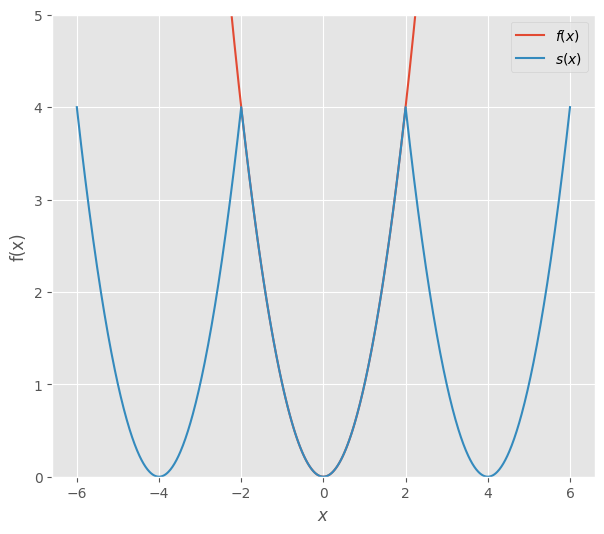

In [51]:
N = 10000
xrange = (-6., 6., 1000)
xs   = np.linspace(*xrange)
fx = lambda x: x*x
def sx(x):
    ss = 4./3.
    for n in range(1, N):
        ss = ss + 16 * (-1)**n * np.cos( n*np.pi*x/2) / (n*n*np.pi*np.pi)
    return ss

fig, (ax1) = plt.subplots(1, 1, figsize=(7, 6))
ax1.plot(xs, fx(xs), label = '$f(x)$')
ax1.plot(xs, sx(xs), label = '$s(x)$')
ax1.set_xlabel('$x$'); ax1.set_ylabel('f(x)')
ax1.legend()
ax1.set_ylim(0,5)

A alternativa implica definir:

$g(x) = \begin{cases} 0 & \text{se}~ -2 < x < 0 \\
x^{2} & \text{se}~ 0  < x < 2  \end{cases}$

e

$h(x) = \begin{cases} \left(x + 2\right)^{2} & \text{se}~ -2 < x < 0 \\
0 & \text{se}~ 0  < x < 2  \end{cases}$


Os coeficientes de Fourier son, para $g(x)$:

$$ 
\begin{align}
a_0|_{g(x)} & = \frac{2}{3} \\
a_n|_{g(x)} & = \frac{8 \left(-1\right)^{n}}{\pi^{2} n^{2}} \\
b_n|_{g(x)} & = - \frac{4 \left(-1\right)^{n}}{\pi n} + \frac{8 ( \left(-1\right)^{n}-1)}{\pi^{3} n^{3}}
\end{align}
$$

e $h(x)$:

$$ 
\begin{align}
a_0|_{h(x)} & = \frac{2}{3} \\
a_n|_{h(x)} & = \frac{8}{\pi^{2} n^{2}} \\
b_n|_{h(x)} & = - \frac{4}{\pi n} + \frac{8 ( \left(1-\left(-1\right)^{n}\right)}{\pi^{3} n^{3}}
\end{align}
$$

A nosa serie de Fourier sería a suma das dúas: $s(x)=g(x)+h(x)$:

$$ 
\begin{align}
a_0|_{s(x)} & = \frac{4}{3} \\
a_n|_{s(x)} & = \frac{8(1+(-1)^n)}{\pi^{2} n^{2}} \\
b_n|_{s(x)} & = - \frac{4(1+(-1)^n)}{\pi n}
\end{align}
$$



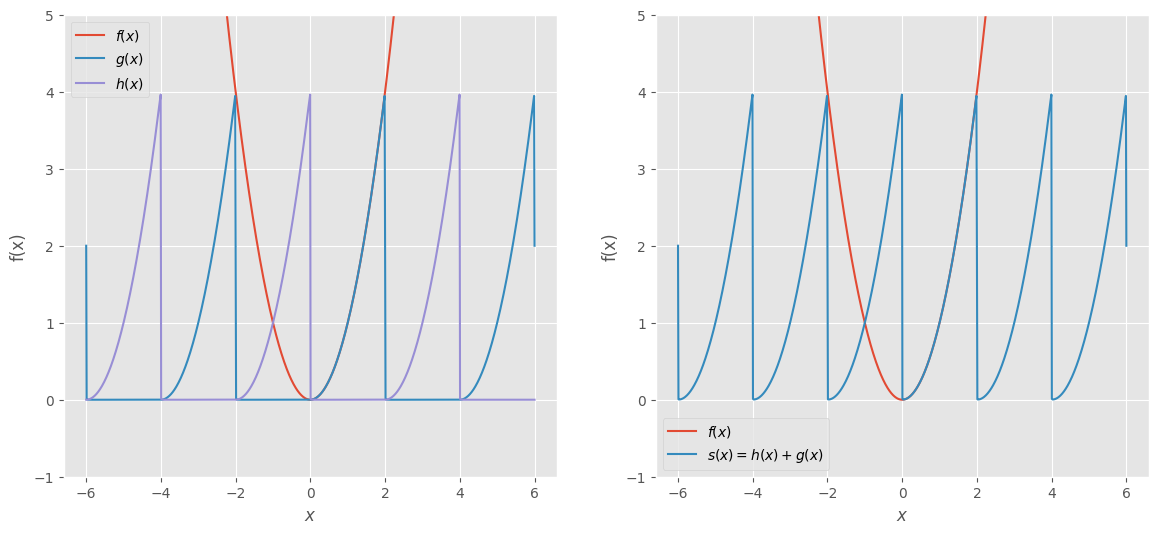

In [55]:
def gx(x):
    ss = 2./3.
    for n in range(1, N):
        ss += 8 * (-1)**n * np.cos( n*np.pi*x/2) / (n*n*np.pi*np.pi)
        ss += (-4*(-1)**n/(np.pi*n) + 8*((-1)**n-1)/(np.pi**3*n**3))* np.sin( n*np.pi*x/2.)
    return ss

def hx(x):
    ss = 2./3.
    for n in range(1, N):
        ss += 8 * np.cos( n*np.pi*x/2) / (n*n*np.pi*np.pi)
        ss += (-4/(np.pi*n) + 8*(1-(-1)**n)/(np.pi**3*n**3))* np.sin( n*np.pi*x/2.)
    return ss

def sx(x): return (gx(x)+hx(x))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
ax1.plot(xs, fx(xs), label = '$f(x)$')
ax1.plot(xs, gx(xs), label = '$g(x)$')
ax1.plot(xs, hx(xs), label = '$h(x)$')
ax1.set_xlabel('$x$'); ax1.set_ylabel('f(x)')
ax1.legend()
ax1.set_ylim(-1,5)

ax2.plot(xs, fx(xs), label = '$f(x)$')
ax2.plot(xs, sx(xs), label = '$s(x) = h(x)+g(x)$')
ax2.set_xlabel('$x$'); ax2.set_ylabel('f(x)')
ax2.legend()
tmp=ax2.set_ylim(-1,5)


**A beleza dos números complexos** permítenos reescribir de forma compacta e elegante os desenvolvementos de Fourier, observa:

 $$
 \cos nx = \frac{1}{2} \left( e^{inx} + e^{-inx} \right), \; \sin nx = -\frac{i}{2} \left(e^{inx} - e^{-inx} \right),
 $$

 Entón:

$$
S(x) = \frac{a_0}{2} + \frac{1}{2} \sum_{n=1} (a_n - i b_n) \, e^{inx} + \frac{1}{2} \sum_{n=1} (a_n + i b_n) \, e^{-inx}
$$

 Se definimos:

$$
c_0 = a_0/2, \; c_n = \frac{1}{2}(a_n - i b_n), \; c_{-n} = c^*_n = \frac{1}{2}(a_n + i b_n)
$$

 temos:

 $$
 S(x) = \sum_{n = -\infty}^{\infty} c_n \, e^{inx}
 $$



*Pero esta é outra historia e hai que contala noutra ocasión.*



#### Aínda hai máis!

 Joseph Fourier foi un gran físico e matemático francés que se decatou de que unha función periódica podía descompoñerse nunha serie de sumas de senos e cosenos. Fourier participou na famosa expedición "científica" de Napoleón a Exipto.

<img src="imgs/Fourier.jpg" width="200"/>
 
 Aquí tedes a súa [entrada](https://gl.wikipedia.org/wiki/Joseph_Fourier) na Wikipedia.

 Por certo, Dirichlet foi o seu alumno.

 Na análise da transformada de Fourier é fundamental en física cuántica, en óptica, e ten aplicacións fundamentais na propagación de sinais e procesamento de imaxes.

 Algúns dos teus filtros de Instagram son algoritmos que modifican as transformadas de Fourier das imaxes.
